# Feature Reduction, Fine Tuning and Model Selection

# Feature Dimensionality Reduction


Feature reduction is also known as dimensionality reduction. It is the process of reducing the number of features in a resource heavy computation without losing important information.

There are many techniques by which feature reduction is accomplished. 

Some of those are `linear discriminant analysis`, `autoencoders`, `non-negative matrix factorization`, and `principal component analysis`, `Truncated Singular Value Decomposition`.

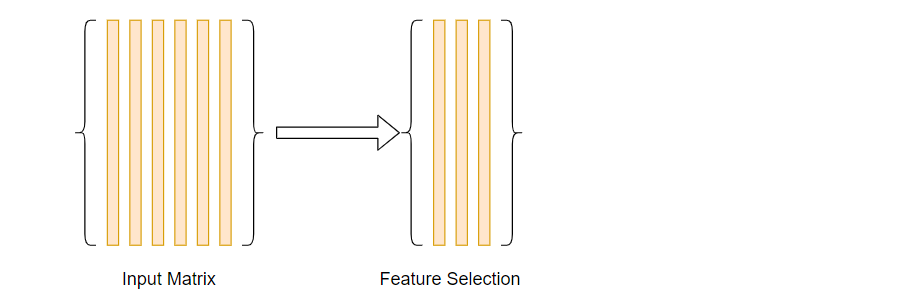

## Why Feature Selection?

The purpose of using feature reduction is to reduce the number of features that the computer must process to perform its function. Feature reduction leads to the need for fewer resources to complete computations.

Less computation time and less storage capacity needed means the computer can do more work. During machine learning, feature reduction removes multicollinearity resulting in improvement of the machine learning model as well. 

### Principal Components Analysis (PCA)

Principal component analysis (PCA) is a popular linear dimensionality reduction
technique. 

PCA projects observations onto the (hopefully fewer) principal compo‐
nents of the feature matrix that retain the most variance. 

PCA is an unsupervised
technique, meaning that it does not use the information from the target vector and
instead only considers the feature matrix.

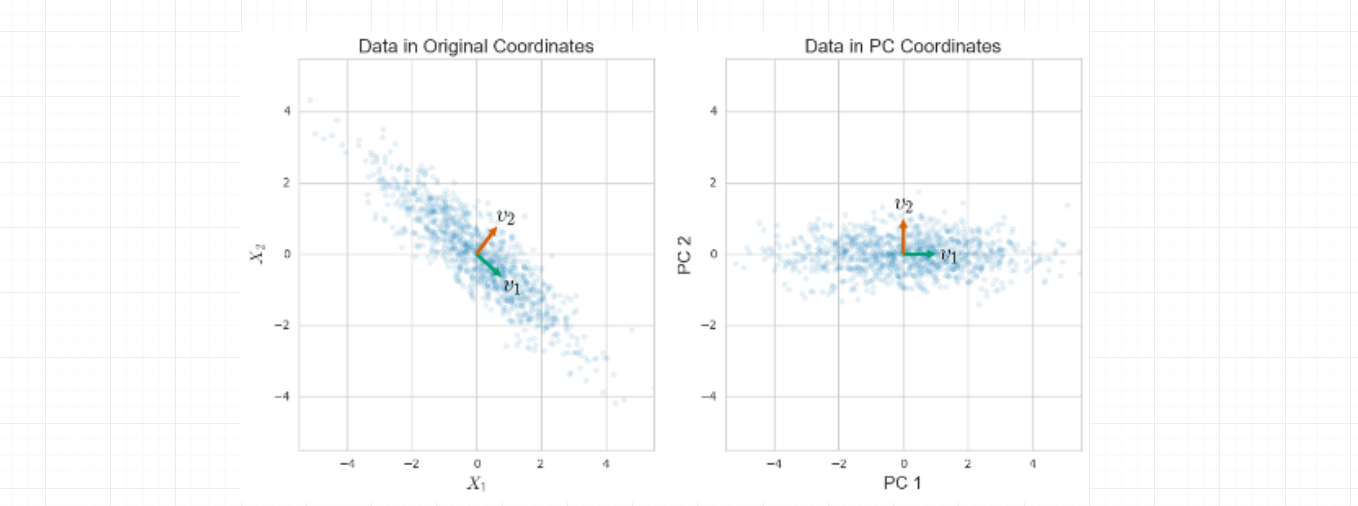

### Linear Discriminant Analysis (LDA)

LDA is a classification that is also a popular technique for dimensionality reduction.

LDA works similarly to principal component analysis (PCA) in that it projects our feature space onto a lower-dimensional space. 

However, in PCA we were only interested in the component axes that maximize the variance in the data, while in LDA we have the additional goal of maximizing the differences between classes. 


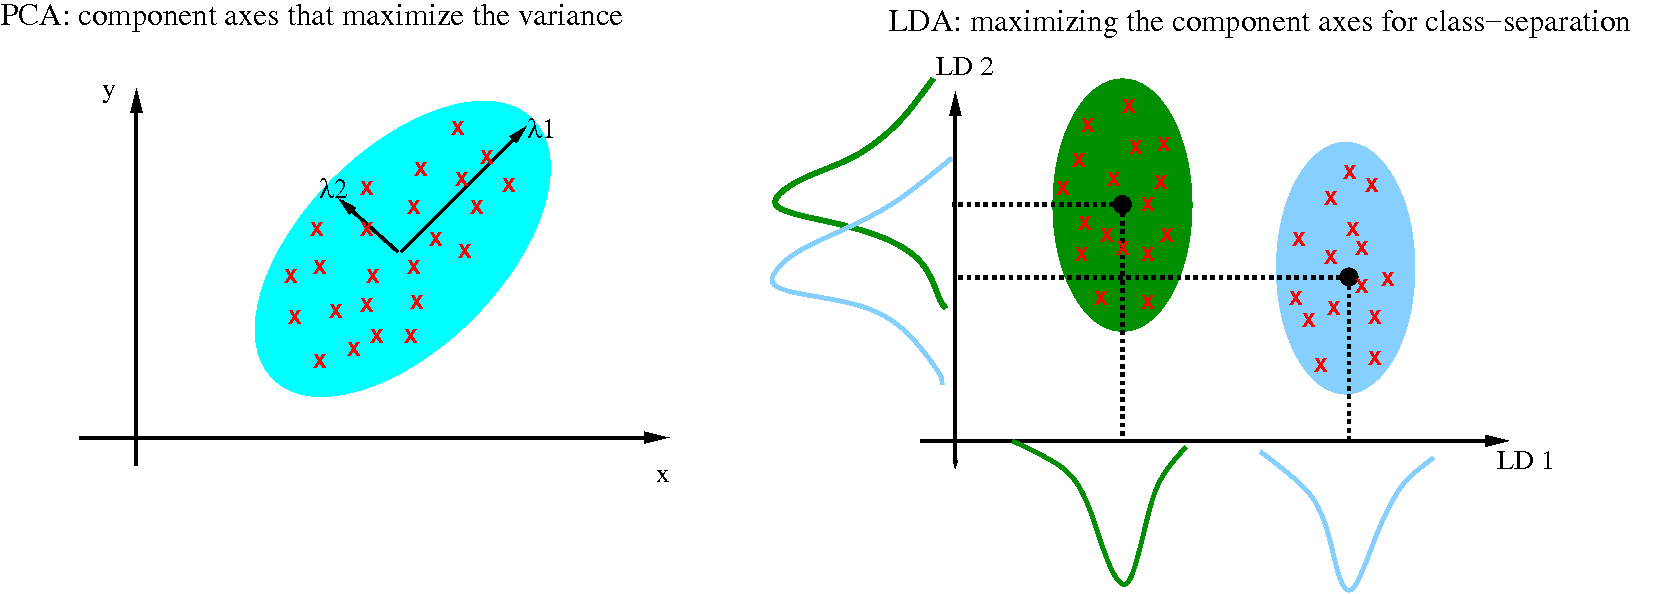

How to Prepare Data for LDA
This section lists some suggestions you may consider when preparing your data for use with LDA.

- **Classification Problems.** This might go without saying, but LDA is intended for classification problems where the output variable is categorical. LDA supports both binary and multi-class classification.

- **Gaussian Distribution.** The standard implementation of the model assumes a Gaussian distribution of the input variables. Consider reviewing the univariate distributions of each attribute and using transforms to make them more Gaussian-looking (e.g. log and root for exponential distributions and Box-Cox for skewed distributions).

- **Remove Outliers.** Consider removing outliers from your data. These can skew the basic statistics used to separate classes in LDA such the mean and the standard deviation.

- **Same Variance.** LDA assumes that each input variable has the same variance. It is almost always a good idea to standardize your data before using LDA so that it has a mean of 0 and a standard deviation of 1.

### Non-Negative Matrix Factorization (NMF)

NMF is an unsupervised technique for linear dimensionality reduction that factorizes

i.e. breaks up into multiple matrices whose product approximates the original
matrix

NMF can reduce dimensionality because in matrix multiplication, the two factors can have significantly fewer dimensions than the product matrix.

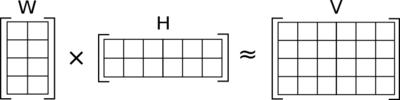

One major requirement of NMA is that, as the name implies, the feature matrix can not contain negative values.


It can also be used in sparse matrix

### Truncated Singular Value Decomposition (TSVD) 

TSVD is similar to PCA and in fact, PCA actually often uses non-truncated Singular Value Decomposition (SVD) in one of its steps.





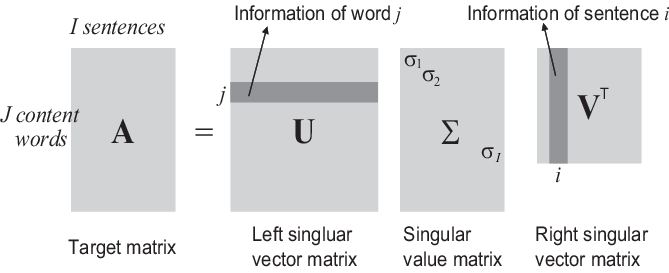

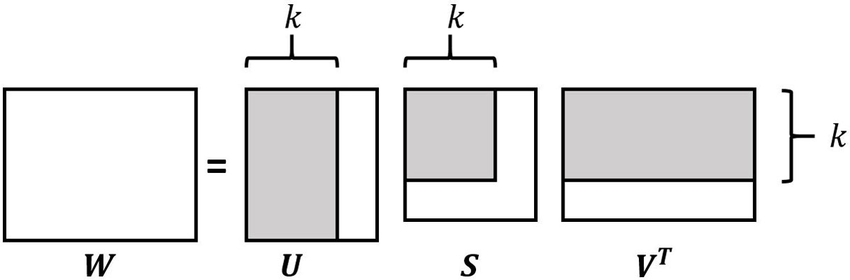

The practical advantage of TSVD is that unlike PCA, it works on sparse feature matrices.



## TF-IDF and Sparse Matrix

In [1]:
import numpy as np
import pandas as pd
import os
import sys

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/laxmimerit/twitter-data/master/twitter30k_cleaned.csv')
df

,twitts,sentiment
0,robbiebronniman sounds like a great night,1
1,damn the person who stolde my wallet may karma...,1
2,greetings from the piano bench photo,1
3,drewryanscott i love it i love you haha forget...,1
4,kissthestars pretty pretty pretty please pakid...,0
...,...,...
29995,calumfan1 is it in any way related to photoshop,0
29996,swiz_nz really wow thats crap,0
29997,at the 2010 lexus hs250h press event again can...,0
29998,karmicunderpath ooh now there is a nice thought,1


In [4]:
df['sentiment'].value_counts()

1    15000
0    15000
Name: sentiment, dtype: int64

In [56]:
X = df['twitts']
y = df['sentiment']

In [57]:
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(X)

In [58]:
X

<30000x42126 sparse matrix of type '<class 'numpy.float64'>'
	with 350520 stored elements in Compressed Sparse Row format>

To see how sparsed it is.

In [8]:
350520/(X.shape[0]*X.shape[1])

0.00027735840098751366

In [9]:
len(tfidf.vocabulary_)

42126

In [10]:
X.shape, y.shape

((30000, 42126), (30000,))

In [11]:
type(X), type(y)

(scipy.sparse.csr.csr_matrix, pandas.core.series.Series)

In [12]:
sys.getsizeof(X)

56

In [13]:
sys.getsizeof('hello')

54

In [18]:
# X.toarray()
# Unable to allocate 9.42 GiB for an array with shape (30000, 42126) and data type float64



In [19]:
X.data

array([0.32137705, 0.33872744, 0.27319627, ..., 0.10368016, 0.10257841,
       0.08647948])

In [20]:
d = (X.data.nbytes + X.indptr.nbytes + X.indices.nbytes)

In [21]:
d

4326244

In [23]:
d/2**20 #MB

4.125827789306641

In [24]:
(X.shape[0] * X.shape[1])*8/(2**20) #MB

9641.876220703125

##  Non-Negative Matrix Factorization (NMF)

In [26]:
from sklearn.decomposition import NMF

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

In [31]:
%%time
nmf = NMF(n_components=50, random_state=0)
X_train_nmf = nmf.fit_transform(X_train)

Wall time: 26.9 s


In [32]:
X_train.shape, X_train_nmf.shape

((24000, 42126), (24000, 50))

In [39]:
def run_svm(clf, X_train, X_test, y_train, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    print()
    print('Printing Report')
    print(classification_report(y_test, y_pred))

In [40]:
X_test_nmf = nmf.transform(X_test)

In [52]:


%%time
clf = LinearSVC()
run_svm(clf, X_train_nmf, X_test_nmf, y_train, y_test)


Printing Report
              precision    recall  f1-score   support

           0       0.66      0.62      0.64      3000
           1       0.64      0.68      0.66      3000

    accuracy                           0.65      6000
   macro avg       0.65      0.65      0.65      6000
weighted avg       0.65      0.65      0.65      6000

Wall time: 162 ms


In [53]:
%%time
clf = LinearSVC()
run_svm(clf, X_train, X_test, y_train, y_test)


Printing Report
              precision    recall  f1-score   support

           0       0.75      0.74      0.75      3000
           1       0.75      0.75      0.75      3000

    accuracy                           0.75      6000
   macro avg       0.75      0.75      0.75      6000
weighted avg       0.75      0.75      0.75      6000

Wall time: 147 ms


## Truncated Singular Value Decomposition (TSVD)

In [54]:
from sklearn.decomposition import TruncatedSVD as TSVD

In [59]:
%%time
tsvd = TSVD(n_components=500, random_state=0)
X_train_tsvd = tsvd.fit_transform(X_train)

MemoryError: Unable to allocate 164. MiB for an array with shape (42126, 510) and data type float64

In [60]:
sum(tsvd.explained_variance_)

AttributeError: 'TruncatedSVD' object has no attribute 'explained_variance_'

In [35]:
X_test_tsvd = tsvd.transform(X_test)

In [36]:
%%time
clf = LinearSVC()
run_svm(clf, X_train_tsvd, X_test_tsvd, y_train, y_test)


Printing Report
              precision    recall  f1-score   support

           0       0.75      0.72      0.73      3000
           1       0.73      0.76      0.74      3000

    accuracy                           0.74      6000
   macro avg       0.74      0.74      0.74      6000
weighted avg       0.74      0.74      0.74      6000

Wall time: 2.59 s


In [37]:
X.shape, X_train_tsvd.shape

((30000, 42126), (24000, 500))

In [38]:
X_train_tsvd

array([[ 0.13218418,  0.15081949,  0.07174237, ...,  0.00694312,
         0.00537735,  0.00164415],
       [ 0.09547571,  0.01026102, -0.06350304, ...,  0.02398168,
        -0.00099321,  0.00093923],
       [ 0.2162028 , -0.02759448,  0.05896985, ..., -0.02108054,
        -0.01421668,  0.01929527],
       ...,
       [ 0.05353346, -0.01926083, -0.01953992, ..., -0.05901932,
        -0.01147952,  0.05518048],
       [ 0.03616033,  0.00122404, -0.0132424 , ...,  0.00216271,
        -0.00200578,  0.00636467],
       [ 0.09077638, -0.08306414, -0.0348333 , ...,  0.02917843,
         0.01622569, -0.02136172]])

In [39]:
(X.shape[0] * X.shape[1])*8/(2**20)

9641.876220703125

In [40]:
sys.getsizeof(X_train_tsvd)/(2**20)

91.55284118652344